# 05. DheerajKumar97/Employee-Salary-Prediction----python--ML

## Predictions with ML Regression Models (T1) - train.csv

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('05_train.csv')

In [2]:
# First 5 rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Last 5 rows of the dataset
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
# All available columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Preprocessing

All preprocessing steps are done in almost exactly the same way as the author.

In [5]:
# Let's get the categorical columns by checking the data type
cat_var = [var for var in df.columns if df[var].dtypes == "object"]
cat_var = df[cat_var]
# Also check the unique values in those columns
print("Gender ->", cat_var['Gender'].unique())
print("Age ->", cat_var["Age"].unique())
print("City_Category ->", cat_var["City_Category"].unique())
print("Stay_In_Current_City_Years ->", cat_var['Stay_In_Current_City_Years'].unique())
cat_var.head(10)

Gender -> ['F' 'M']
Age -> ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category -> ['A' 'C' 'B']
Stay_In_Current_City_Years -> ['2' '4+' '3' '1' '0']


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
5,P00193542,M,26-35,A,3
6,P00184942,M,46-50,B,2
7,P00346142,M,46-50,B,2
8,P0097242,M,46-50,B,2
9,P00274942,M,26-35,A,1


In [6]:
# Is there any NaN values in these columns?
cat_var.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [7]:
# Give these categorical age ranges some ordered values
def order_age(Age):
    if Age == "0-17":      return 1
    elif Age == "18-25":   return 2
    elif Age == "26-35":   return 3
    elif Age == "36-45":   return 4
    elif Age == "46-50":   return 5
    elif Age == "51-55":   return 6
    elif Age == "55+":     return 7
    else:    return 0
cat_var['Age'] = cat_var['Age'].apply(order_age)

In [8]:
# Give these categorical current city years being stayed some ordered values
def order_stay_in_current_city_years(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == "0":      return 1
    elif Stay_In_Current_City_Years == "1":    return 2
    elif Stay_In_Current_City_Years == "2":    return 3
    elif Stay_In_Current_City_Years == "3":    return 4
    elif Stay_In_Current_City_Years == "4+":   return 5
cat_var['Stay_In_Current_City_Years'] = cat_var['Stay_In_Current_City_Years'].apply(order_stay_in_current_city_years)

In [9]:
# Latest status of categorical columns
cat_var

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,1,A,3
1,P00248942,F,1,A,3
2,P00087842,F,1,A,3
3,P00085442,F,1,A,3
4,P00285442,M,7,C,5
...,...,...,...,...,...
550063,P00372445,M,6,B,2
550064,P00375436,F,3,C,4
550065,P00375436,F,3,B,5
550066,P00375436,F,7,C,3


In [10]:
# Let's get the numerical columns by checking the data type (by not being object)
num_var = [var for var in df.columns if df[var].dtypes !="object"]
num_var = df[num_var]
num_var

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


In [11]:
# However, these two columns will be dropped due to having null values, plus user ID has no meaning here.
num_var = num_var.drop(['Product_Category_2','Product_Category_3','User_ID'], axis=1)
num_var

,Occupation,Marital_Status,Product_Category_1,Purchase
0,10,0,3,8370
1,10,0,1,15200
2,10,0,12,1422
3,10,0,12,1057
4,16,0,8,7969
...,...,...,...,...
550063,13,1,20,368
550064,1,0,20,371
550065,15,1,20,137
550066,1,0,20,365


## Prepare Train and Test Sets

In [12]:
# Create several dummy columns from categorical and numerical ones, then merge them with some other columns and purchase
dummy_gender = pd.get_dummies(cat_var['Gender'], prefix='gender')
dummy_age = pd.get_dummies(cat_var['Age'], prefix='age')
dummy_city = pd.get_dummies(cat_var['City_Category'], prefix='city')
dummy_city_years = pd.get_dummies(cat_var['Stay_In_Current_City_Years'], prefix='cityyears')
dummy_occupation = pd.get_dummies(num_var['Occupation'], prefix='occ')
dummy_prod_cat = pd.get_dummies(num_var['Product_Category_1'], prefix='prod_cat1')
df_cons = pd.concat([dummy_gender, dummy_age, dummy_city, dummy_city_years, dummy_occupation, dummy_prod_cat,
                    num_var['Marital_Status'], df['Purchase']], axis=1)
df_cons.head(8)

,gender_F,gender_M,age_1,age_2,age_3,age_4,age_5,age_6,age_7,city_A,...,prod_cat1_13,prod_cat1_14,prod_cat1_15,prod_cat1_16,prod_cat1_17,prod_cat1_18,prod_cat1_19,prod_cat1_20,Marital_Status,Purchase
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8370
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15200
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1422
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1057
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7969
5,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15227
6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,19215
7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,15854


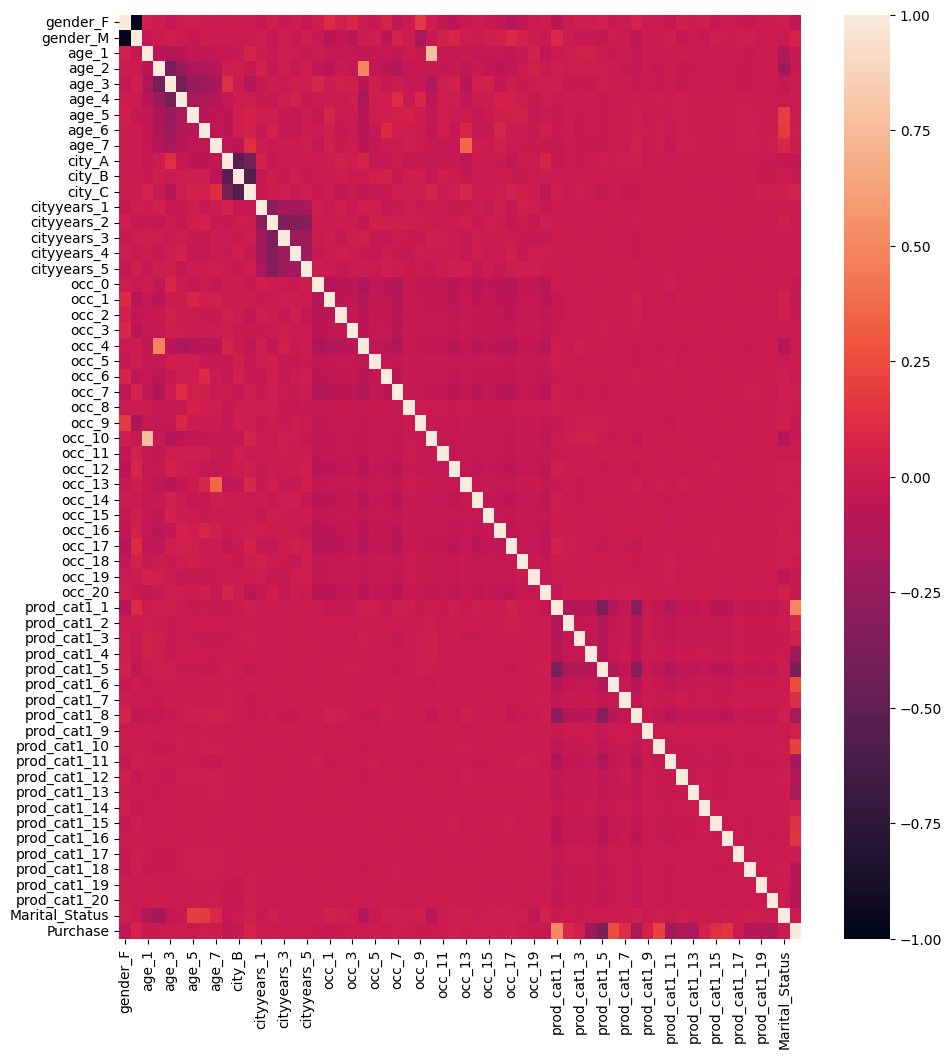

#### COLUMN CORRELATIONS AGAINST PURCHASE ####
gender_F         -0.060346
gender_M          0.060346
age_1            -0.011055
age_2            -0.008831
age_3            -0.001830
age_4             0.006707
age_5            -0.003317
age_6             0.014792
age_7             0.002904
city_A           -0.042465
city_B           -0.019098
city_C            0.061012
cityyears_1      -0.006605
cityyears_2      -0.002030
cityyears_3       0.005358
cityyears_4       0.002090
cityyears_5       0.000988
occ_0            -0.010576
occ_1            -0.019005
occ_2            -0.013975
occ_3            -0.003095
occ_4            -0.003872
occ_5             0.002072
occ_6            -0.000290
occ_7             0.011176
occ_8             0.002839
occ_9            -0.013409
occ_10           -0.009409
occ_11           -0.001464
occ_12            0.025995
occ_13            0.001007
occ_14            0.010772
occ_15            0.015416
occ_16            0.005713
occ_17            0.031099
occ_18  

In [13]:
# Get the correlations of all involved columns in a heat map
plt.figure(figsize=(11,12))
sns.heatmap(df_cons.corr())
plt.show()
print("#### COLUMN CORRELATIONS AGAINST PURCHASE ####")
print(df_cons.corr()['Purchase'])

### Type 1: Use All Columns

In [14]:
# Use 80% of the dataset as training, and 20% as testing
X = df_cons.drop(columns='Purchase', axis=1)
Y = df_cons.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, " TEST SIZE:", x_test.shape)

TRAIN SIZE: (440054, 59)  TEST SIZE: (110014, 59)


In [15]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [16]:
linreg = LinearRegression(fit_intercept=True, positive=False)
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [17]:
# Fit the training data into the linear reg. model, then make predictions on the test data
s_time = time.time()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 2.863 seconds.


In [18]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [-6.43252617e+12 -6.43252617e+12 -6.18831420e+12 -6.18831420e+12
 -6.18831420e+12 -6.18831420e+12 -6.18831420e+12 -6.18831420e+12
 -6.18831420e+12  3.18975408e+13  3.18975408e+13  3.18975408e+13
  7.31589033e+13  7.31589033e+13  7.31589033e+13  7.31589033e+13
  7.31589033e+13 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13
 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13
 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13
 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13
 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13 -5.00877543e+13
 -5.00877543e+13 -5.00877543e+13  1.14495652e+14  1.14495652e+14
  1.14495652e+14  1.14495652e+14  1.14495652e+14  1.14495652e+14
  1.14495652e+14  1.14495652e+14  1.14495652e+14  1.14495652e+14
  1.14495652e+14  1.14495652e+14  1.14495652e+14  1.14495652e+14
  1.14495652e+14  1.14495652e+14  1.14495652e+14  1.14495652e+14
  1.14495652e+14  1.14495652e+14 -4.86250000e+01]
RANK: 59
INTERCEPT: -1568435014202

In [19]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

          6930.40625 |     5977
           13499.625 |    19203
           13912.875 |    15582
          7654.03125 |     5942
         14706.46875 |    20266
           6054.0625 |     8611
          2214.40625 |     2762
            7214.375 |     3935
           10322.625 |     5722
             8010.75 |     6038
          6074.59375 |     5191
          13881.9375 |    15719
          13489.6875 |    15499
           6545.3125 |     8612
            7112.125 |     7908
            6321.125 |     8584
          7937.34375 |     3951
            5806.875 |     8770
          7742.53125 |     7899
         19434.90625 |    23301


In [20]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
# The time in seconds for fitting the estimator on the train set for each cv split
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# The time in seconds for scoring the estimator on the test set for each cv split
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# The score array for train scores for each cv split
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
# The score array for test score for each cv split
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 9045577.917398138
RMSE: 3007.586726496534
MAE: 2280.1414149562784
R2 SCORE: 0.6406920900627433

# CROSS VALIDATION #
FITTING TIME: [2.58628845 2.52077889 2.54764128 2.68803859 2.31251645] -> 2.5310527324676513
SCORING TIME: [0.0394547  0.04290271 0.05032563 0.06874895 0.0382998 ] -> 0.04794635772705078
TRAIN SCORE: [0.64262757 0.64230771 0.64189785 0.64203455 0.63141868] -> 0.6400572723884616
TEST SCORE: [ 6.29670372e-01  6.30924917e-01  6.32610795e-01  6.32069794e-01
 -1.74704396e+19] -> -3.494087912638411e+18


## 2 - Lasso Regression

In [21]:
lasso = Lasso(alpha=1.0, fit_intercept=True, positive=False, tol=0.0001, selection='cyclic')
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [22]:
# Fit the training data into the lasso model, then make predictions on the test data
s_time = time.time()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 20.868 seconds.


In [23]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
print("ITERATIONS:", lasso.n_iter_)   # Number of iterations run by the coord. descent solver to reach the specified tolerance

COEF: [   44.48177398    -0.           -53.13401336  -221.52321732
  -125.50712302     0.             0.           229.77830361
   110.01865654  -136.2568275      0.           414.48254553
    -0.            -0.            26.38143069    -0.
    15.94725014  -109.24586598  -111.06230661   -36.77996056
   106.79606903    43.94176415   -33.90289315    81.49514026
     0.           -24.81768995     0.          -138.77542861
     0.           153.95150449     0.            69.57277653
   245.42631095     0.            65.97902563   -65.79633204
  -367.08491159  -163.59882042  3501.99353971  1146.44537144
     0.         -7696.046564   -3834.8784593   5706.79567518
  6164.22656569 -2587.40655503  3963.09425651  9447.20809261
 -5364.40952653 -8643.47957193 -9281.70484657  2699.55706873
  4619.94464588  4640.75336358    -0.         -6983.14909867
 -9846.09763618 -9614.05742891   -36.81663352]
INTERCEPT: 10077.51365580757
ITERATIONS: 538


In [24]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   6976.393375995849 |     5977
   13483.16246460479 |    19203
  13851.314937159605 |    15582
   7712.680204339766 |     5942
  14651.582968407518 |    20266
   6050.547540857471 |     8611
  2245.6800555258296 |     2762
   7236.008290709975 |     3935
  10344.568533345295 |     5722
   7977.791669329418 |     6038
   6076.928971546253 |     5191
  13868.482618027349 |    15719
  13487.641999617495 |    15499
  6524.0180628491635 |     8612
   7145.478714960546 |     7908
   6287.313703253358 |     8584
    7938.09620762132 |     3951
   5846.472490373013 |     8770
   7719.885404392501 |     7899
  19332.530574424884 |    23301


In [25]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-lasso.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 9050253.918524114
RMSE: 3008.3639936889476
MAE: 2281.7679824054544
R2 SCORE: 0.6405063502231463
ADJUSTED R2 SCORE: 0.6398843455980567
# CROSS VALIDATION #
FITTING TIME: [23.08907747 22.43275881 23.76906323 23.35278249 50.00922418] -> 28.53058123588562
SCORING TIME: [0.04788804 0.04244566 0.04359484 0.04164457 0.04608822] -> 0.044332265853881836
TRAIN SCORE: [0.64246687 0.64215092 0.64173821 0.6418791  0.63124137] -> 0.6398952945027048
TEST SCORE: [0.62957669 0.63085884 0.63244663 0.63190911 0.5090068 ] -> 0.6067596159641664


## 3 - Ridge Regression

In [26]:
ridge = Ridge(alpha=1.0, fit_intercept=True, positive=True, tol=0.0001, solver='auto')
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [27]:
# Fit the training data into the ridge model, then make predictions on the test data
s_time = time.time()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 1.777 seconds.


In [28]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [1.48344095e+03 1.42611754e+03 4.33874640e+02 2.82646670e+02
 3.61491203e+02 5.00562667e+02 5.07352711e+02 7.27759455e+02
 6.10558567e+02 6.57658236e+02 8.27739628e+02 1.19154857e+03
 1.48230740e+02 1.20568807e+02 1.84914296e+02 1.48992314e+02
 1.72870329e+02 3.14158339e+02 3.00120661e+02 3.69162625e+02
 5.62180154e+02 4.94251158e+02 3.52145563e+02 5.38136310e+02
 4.33638270e+02 3.14335659e+01 4.80968178e+02 2.77761577e+02
 4.42201989e+02 5.96004872e+02 4.36966117e+02 5.21529109e+02
 7.25359789e+02 4.35077125e+02 5.13537658e+02 2.99940413e+02
 1.28522805e+00 2.46673075e+02 1.31496454e+04 1.07868829e+04
 9.64449280e+03 1.87564240e+03 5.81931529e+03 1.53327206e+04
 1.59934008e+04 7.06251896e+03 1.38683305e+04 1.94124938e+04
 4.25198343e+03 1.11339408e+03 1.45444499e+02 1.26389466e+04
 1.42235139e+04 1.43855650e+04 1.00349616e+04 2.33645839e+03
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
INTERCEPT: -2888.3213909737024
ITERATIONS: None


In [29]:
# Compare the predicted values against the actual ones for the top 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   6993.608816013664 |     5977
  13510.778862511554 |    19203
  13926.017945905951 |    15582
   7651.730634742109 |     5942
  14752.103510329973 |    20266
   6024.355148685776 |     8611
   2148.616513738578 |     2762
   7230.995036980621 |     3935
  10291.789459687421 |     5722
  7988.3806755648475 |     6038
   6088.700637604816 |     5191
  13822.350351526551 |    15719
  13475.466207163705 |    15499
   6531.873564083155 |     8612
  7118.5371798812175 |     7908
    6350.90889072404 |     8584
   7971.591798685526 |     3951
   5853.812390883808 |     8770
   7737.683197979088 |     7899
   19611.53728582682 |    23301


In [30]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
adj_r2 = 1-(1-ridge.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
print("ADJUSTED R2 SCORE:", adj_r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 9052203.535451354
RMSE: 3008.688008991852
MAE: 2282.7060460746457
R2 SCORE: 0.6404289076551091
ADJUSTED R2 SCORE: 0.639842439012449
# CROSS VALIDATION #
FITTING TIME: [2.23538208 1.91675663 2.14885974 2.05119419 1.99440932] -> 2.0693203926086428
SCORING TIME: [0.04649448 0.0458982  0.05594468 0.06398082 0.06365418] -> 0.05519447326660156
TRAIN SCORE: [0.64245825 0.64216637 0.6417334  0.6418789  0.63132961] -> 0.6399133070350812
TEST SCORE: [0.62956278 0.63081447 0.63252614 0.63194265 0.67017821] -> 0.6390048485731323


## 4 - Polynomial Regression

In [31]:
poly_feat = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True, order='C')
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': True, 'order': 'C'}

In [32]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(440054, 1771) (110014, 1771)


### Polynomial Regression with Ridge

In [33]:
ridge = Ridge(max_iter=1000)
s_time = time.time()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 59.971 seconds.


In [34]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function. Set to 0.0 if fit_intercept = False
# Actual number of iterations for each target. Only for 'sag' & 'lsqr' solvers. Other solvers will return None
print("ITERATIONS:", ridge.n_iter_)
print("FEATURES:", ridge.n_features_in_)   # Number of features seen during fit

COEF: [  0.          15.30242725 -15.30242725 ...   0.          55.95210838
 114.66941556]
INTERCEPT: 9190.363379510927
ITERATIONS: None
FEATURES: 1771


In [35]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 8898842.301552737
RMSE: 2983.0927410244453
MAE: 2247.4639133941855
R2 SCORE: 0.6465207134988821
# CROSS VALIDATION #
FITTING TIME: [0.86338758 0.76515865 0.72827935 0.75009012 0.71851373] -> 0.7650858879089355
SCORING TIME: [0.05791211 0.05455637 0.05555534 0.05221152 0.09332752] -> 0.06271257400512695
TRAIN SCORE: [0.64263063 0.64230932 0.64190017 0.6420408  0.63141987] -> 0.6400601593563813
TEST SCORE: [0.62967553 0.63092256 0.63261617 0.63206692 0.53307529] -> 0.6116712930939678


## 5 - Random Forest Regression

In [36]:
rforest = RandomForestRegressor(n_estimators=25, criterion='friedman_mse', max_depth=25, min_samples_split=2, 
                                min_samples_leaf=2, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
                                bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None, oob_score=True)
# rforest = RandomForestRegressor(n_estimators=40, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
#                                 min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
#                                 bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.2,
 'criterion': 'friedman_mse',
 'max_depth': 25,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Fit the training data into the random forest, then make predictions on the test data
s_time = time.time()
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 13.226 seconds.


In [38]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 17153898.35256752
RMSE: 4141.726494176978
MAE: 3135.9838760454218
R2 SCORE: 0.3186138662868252
# CROSS VALIDATION #
FITTING TIME: [12.09190345 12.10127544 12.38721013 12.00702381 11.97444272] -> 12.112371110916138
SCORING TIME: [0.12442493 0.12805009 0.1319263  0.12949681 0.12368155] -> 0.12751593589782714
TRAIN SCORE: [0.31503226 0.31442267 0.31546027 0.31514149 0.32757394] -> 0.3175261270322233
TEST SCORE: [0.32650217 0.32857429 0.32416925 0.325585   0.27328785] -> 0.31562370954383445


## 6 - Multi-Layer Perceptron Regression

In [39]:
mlpr = MLPRegressor(max_iter=250, hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.1,
                    learning_rate='adaptive', learning_rate_init=0.01, shuffle=True, tol=0.01, max_fun=15000,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-9, n_iter_no_change=10, early_stopping=False, validation_fraction=0.5)
mlpr.get_params()

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-09,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 250,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.01,
 'validation_fraction': 0.5,
 'verbose': False,
 'warm_start': False}

In [40]:
# Fit the training data into the multi-layer perceptron regression model, then make predictions on the test data
s_time = time.time()
mlpr.fit(x_train, y_train)
y_pred = mlpr.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 574.585 seconds.


In [41]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   6371.854251982589 |     5977
   13445.38640163886 |    19203
  14031.453598029684 |    15582
   7889.219006893265 |     5942
  15292.129761216242 |    20266
   6351.780115063089 |     8611
   2351.402708828327 |     2762
   7527.601782405841 |     3935
  10354.588578176388 |     5722
   7847.781154133372 |     6038
   6436.780696280488 |     5191
  14229.505513717764 |    15719
  13170.947896521593 |    15499
   6085.325493296647 |     8612
   7272.154855094128 |     7908
   6731.785404460559 |     8584
   8666.540933261096 |     3951
   6310.350539431195 |     8770
   7832.713100186754 |     7899
  19327.990197043575 |    23301


In [42]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
# Cross validation is disabled due to taking lots of time for fitting
# cross_val = cross_validate(mlpr, X, Y, cv=5, return_train_score=True)
# print("# CROSS VALIDATION #")
# print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
# print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 8910588.681424946
RMSE: 2985.060917540033
MAE: 2238.2226667910168
R2 SCORE: 0.6460541244937623


## 7 - Gradient Boosting

In [43]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
s_time = time.time()
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 62.020 seconds.


In [45]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x263CAD49740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x263CAD49740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x263CAD49740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x263CAD49740)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x263CAD49740)]]
# OF ESTIMATORS: 100
# OF FEATURES: 59
MAX FEATURES: 59
FEATURE IMPORTANCES: [6.70255441e-05 2.53221672e-05 4.79861524e-05 1.52370341e-04
 8.64457614e-06 6.48437611e-05 7.94463541e-09 3.32182380e-04
 2.51285372e-05 1.85882307e-04 2.01692556e-04 3.9132916

In [46]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   7657.861234294635 |     5977
   13290.33094026697 |    19203
   13290.33094026697 |    15582
   7657.861234294635 |     5942
  13880.620294425034 |    20266
   6333.811143635811 |     8611
  3087.1804937166544 |     2762
   7657.861234294635 |     3935
    9432.03868138849 |     5722
   7657.861234294635 |     6038
   6333.811143635811 |     5191
  13948.689648731817 |    15719
   13073.46195594517 |    15499
   6503.363353429655 |     8612
   7657.861234294635 |     7908
   6333.811143635811 |     8584
   7657.861234294635 |     3951
   6333.811143635811 |     8770
   7657.861234294635 |     7899
   18612.35749810945 |    23301


In [48]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
# cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
# print("# CROSS VALIDATION #")
# print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
# print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
# print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
# print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 9233670.02508801
RMSE: 3038.695447899972
MAE: 2331.489426341046
R2 SCORE: 0.6332207065086031


## 8 - XGBoost

In [49]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [50]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
s_time = time.time()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 3.996 seconds.


In [51]:
# Compare the predicted values against the actual ones for the first 20 rows
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

    5744.36181640625 |     5977
     13460.927734375 |    19203
     13993.751953125 |    15582
    7619.58837890625 |     5942
    15559.0224609375 |    20266
     5836.9130859375 |     8611
    2647.07861328125 |     2762
    7587.45751953125 |     3935
    10235.4755859375 |     5722
     7709.6748046875 |     6038
     6159.1845703125 |     5191
     14259.884765625 |    15719
       13268.5859375 |    15499
        6432.6171875 |     8612
      7535.583984375 |     7908
     6665.0927734375 |     8584
      7789.935546875 |     3951
    6247.41943359375 |     8770
    7118.92333984375 |     7899
     19223.654296875 |    23301


In [52]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         
print("RMSE:", rmse)        
print("MAE:", mae)           
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("# CROSS VALIDATION #")
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())

MSE: 8641033.825470567
RMSE: 2939.5635433632942
MAE: 2205.991977893565
R2 SCORE: 0.6567613665064722
# CROSS VALIDATION #
FITTING TIME: [3.1899972  3.50589061 3.84815478 3.39864206 4.29347348] -> 3.64723162651062
SCORING TIME: [0.10606885 0.09704208 0.10482645 0.09532213 0.13531113] -> 0.10771412849426269
TRAIN SCORE: [0.66335874 0.66371618 0.66375384 0.66348985 0.65339834] -> 0.661543388209651
TEST SCORE: [0.64576703 0.6476496  0.64917467 0.6477987  0.59029671] -> 0.6361373426752067


## Results of Metrics of All ML Methods Together

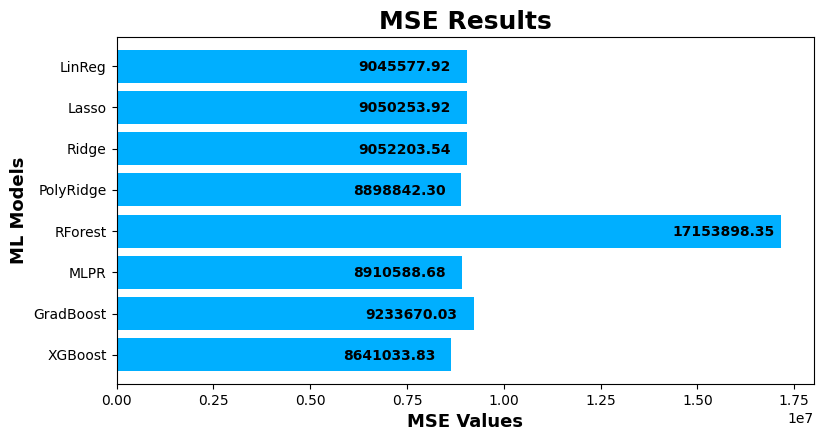

In [57]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyRidge', 'RForest', 'MLPR', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4.5))
plt.barh(range(8), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_mse[i]-2800000, i+0.12, "{:.2f}".format(res_mse[i]), fontweight='bold')
plt.show()

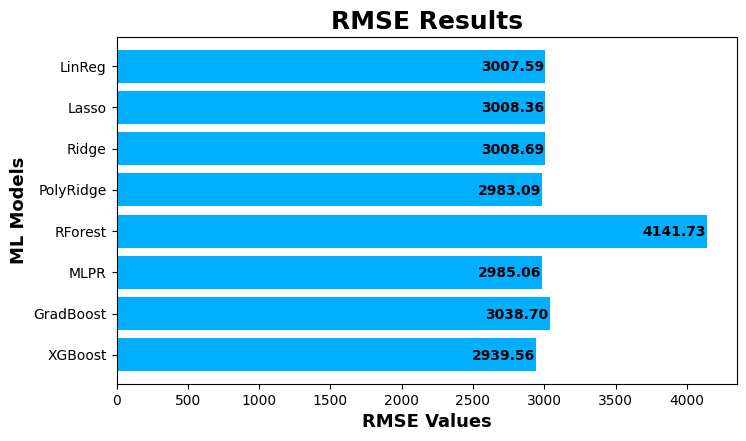

In [58]:
plt.figure(figsize=(8,4.5))
plt.barh(range(8), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_rmse[i]-450, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

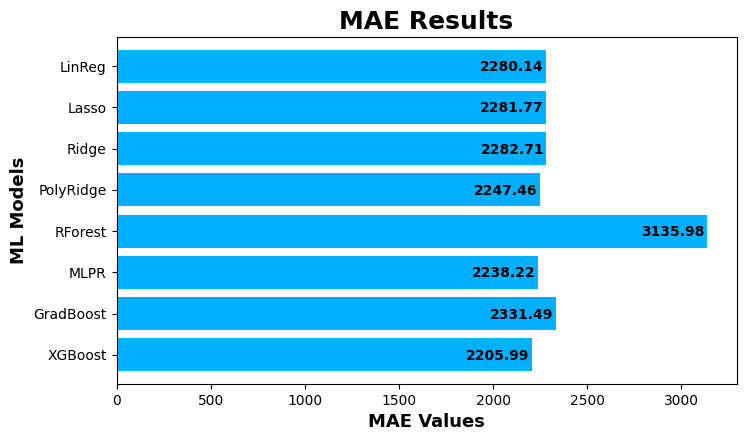

In [59]:
plt.figure(figsize=(8,4.5))
plt.barh(range(8), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_mae[i]-350, i+0.12, "{:.2f}".format(res_mae[i]), fontweight='bold')
plt.show()

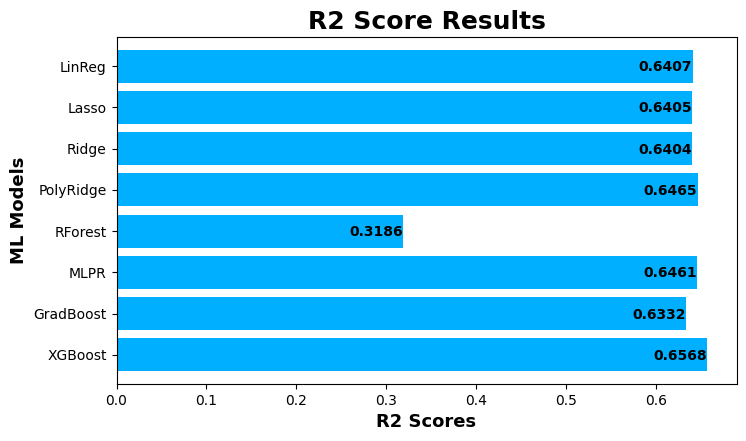

In [60]:
plt.figure(figsize=(8,4.5))
plt.barh(range(8), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(8), methods)
plt.ylim(7.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(8):
    plt.text(res_r2[i]-0.06, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()